In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import consumer_key,consumer_secret ,access_token,access_token_secret

In [2]:
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@BBC"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [3]:
bbc_df = pd.DataFrame({"Twitter Account":"@BBC",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
bbc_df=bbc_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
bbc_df.to_csv("bbc.csv", sep=',', encoding='utf-8')
bbc_df.head()

,Twitter Account,Tweet Date,Tweet,Compound,Positive,Neutral,Negative,Tweets Ago
0,@BBC,Fri Jun 15 18:04:07 +0000 2018,😂 Yer maw + technology = carnage https://t.co/...,0.0000,0.000,1.000,0.0,1
1,@BBC,Fri Jun 15 17:02:02 +0000 2018,📻📚🎧 Listen to @BBCRadio4's serialisation of Ma...,0.3182,0.119,0.881,0.0,2
2,@BBC,Fri Jun 15 16:28:04 +0000 2018,🌊🌋 Watch what happens when molten lava from Ha...,0.3612,0.111,0.889,0.0,3
3,@BBC,Fri Jun 15 16:01:00 +0000 2018,When you remember that you get a lie in tomorr...,0.0000,0.000,1.000,0.0,4
4,@BBC,Fri Jun 15 15:51:09 +0000 2018,RT @bbcwritersroom: Attention #writers Studio ...,0.6588,0.166,0.834,0.0,5


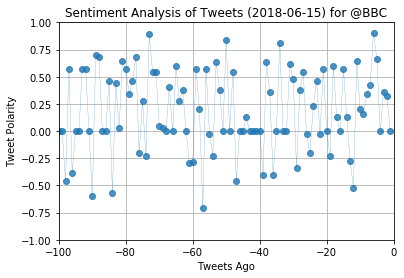

In [6]:
x_vals = bbc_df["Tweets Ago"]
y_vals = bbc_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @BBC")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.savefig("bbc.png")
plt.show()




In [7]:
text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@CBS"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [8]:
cbs_df = pd.DataFrame({"Twitter Account":"@CBS",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
cbs_df=cbs_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
cbs_df.to_csv("cbs.csv", sep=',', encoding='utf-8')
cbs_df.head()

,Twitter Account,Tweet Date,Tweet,Compound,Positive,Neutral,Negative,Tweets Ago
0,@CBS,Fri Jun 15 18:48:29 +0000 2018,"Casting Alert! @paulwesley, @DaniaJRamirez &am...",0.3595,0.128,0.872,0.000,1
1,@CBS,Thu Jun 14 17:30:00 +0000 2018,"In case you missed it, watch the entire #TonyA...",-0.2960,0.000,0.833,0.167,2
2,@CBS,Thu Jun 14 16:19:32 +0000 2018,RT @StrangeAngel: Mastermind or maniac? Explor...,0.1779,0.147,0.734,0.120,3
3,@CBS,Tue Jun 12 00:19:23 +0000 2018,"No pain, no gain, ALL Hart! Just one month unt...",-0.5562,0.134,0.551,0.315,4
4,@CBS,Mon Jun 11 22:23:06 +0000 2018,RT @TheNeighborhood: Welcome to #TheNeighborho...,0.5093,0.171,0.829,0.000,5


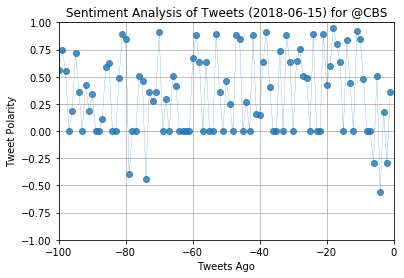

In [9]:
x_vals = cbs_df["Tweets Ago"]
y_vals = cbs_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @CBS")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.savefig("cbs.png")
plt.show()



In [10]:
text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@CNN"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [11]:
cnn_df = pd.DataFrame({"Twitter Account":"@CNN",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
cnn_df=cnn_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
cnn_df.to_csv("cnn.csv", sep=',', encoding='utf-8')
cnn_df.head()

,Twitter Account,Tweet Date,Tweet,Compound,Positive,Neutral,Negative,Tweets Ago
0,@CNN,Sat Jun 16 03:46:07 +0000 2018,A Chihuly sculpture lights up the Biltmore est...,0.0000,0.000,1.000,0.000,1
1,@CNN,Sat Jun 16 03:38:19 +0000 2018,"RT @CNNTonight: ""This is just...right out of t...",-0.2500,0.089,0.786,0.125,2
2,@CNN,Sat Jun 16 03:31:05 +0000 2018,How Frida Kahlo's fashions brought Mexican pol...,0.0000,0.000,1.000,0.000,3
3,@CNN,Sat Jun 16 03:19:54 +0000 2018,"RT @CNNTonight: ""In my experience, whenever de...",-0.4215,0.000,0.882,0.118,4
4,@CNN,Sat Jun 16 03:16:04 +0000 2018,Cristiano Ronaldo's hattrick earns Portugal a ...,0.4767,0.220,0.780,0.000,5


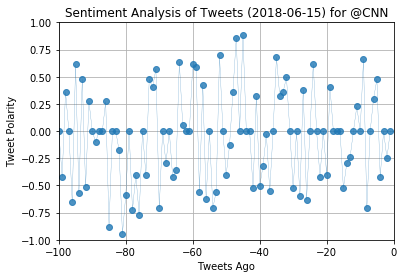

In [12]:
x_vals = cnn_df["Tweets Ago"]
y_vals = cnn_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @CNN")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.savefig("cnn.png")
plt.show()



In [13]:
text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@FOXTV"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [14]:
fox_df = pd.DataFrame({"Twitter Account":"@FOXTV",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
fox_df=fox_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
fox_df.to_csv("cnn.csv", sep=',', encoding='utf-8')
fox_df.head()

,Twitter Account,Tweet Date,Tweet,Compound,Positive,Neutral,Negative,Tweets Ago
0,@FOXTV,Fri Jun 15 23:00:02 +0000 2018,This could be Messi's last #WorldCup and one o...,0.6369,0.181,0.819,0.000,1
1,@FOXTV,Fri Jun 15 21:23:12 +0000 2018,🤘 RETWEET to vote for #That70sShow for #Choice...,0.0000,0.000,1.000,0.000,2
2,@FOXTV,Fri Jun 15 19:03:00 +0000 2018,It's always 5 o'clock for Linda... 🥂 #FridayFe...,0.0000,0.000,1.000,0.000,3
3,@FOXTV,Fri Jun 15 16:30:01 +0000 2018,Ever wonder how the Moon was formed? Uncover t...,0.0000,0.000,1.000,0.000,4
4,@FOXTV,Fri Jun 15 14:00:01 +0000 2018,The most beloved man in all of Spain now becom...,0.1010,0.179,0.694,0.128,5


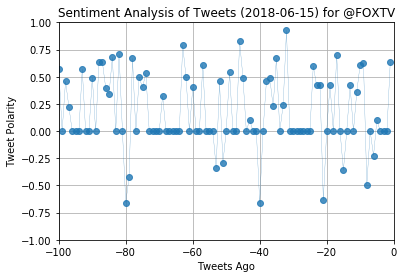

In [15]:
x_vals = fox_df["Tweets Ago"]
y_vals = fox_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @FOXTV")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.savefig("fox.png")
plt.show()



In [16]:
text_tweet = []
date_tweet = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
counter = 1
analyzer = SentimentIntensityAnalyzer()

target_account = "@NYT"
for x in range(1, 6):
    tweets = api.user_timeline(target_account, page=x)
    for tweet in tweets:

        text_tweet.append(tweet["text"])
        date_tweet.append(tweet["created_at"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweets_ago.append(counter)
        counter += 1

In [17]:
nyt_df = pd.DataFrame({"Twitter Account":"@NYT",
                       "Tweet Date":date_tweet,
                       "Tweet":text_tweet,
                       "Compound":compound_list,
                       "Positive":positive_list,
                       "Neutral":neutral_list,
                       "Negative":negative_list,
                       "Tweets Ago":tweets_ago
                      })
nyt_df=nyt_df[["Twitter Account","Tweet Date","Tweet","Compound","Positive","Neutral","Negative","Tweets Ago"]]
nyt_df.to_csv("cnn.csv", sep=',', encoding='utf-8')
nyt_df.head()

,Twitter Account,Tweet Date,Tweet,Compound,Positive,Neutral,Negative,Tweets Ago
0,@NYT,Wed Jun 13 03:10:35 +0000 2018,FIFA Set to Make $6.1 Billion From World Cup. ...,0.0000,0.000,1.000,0.000,1
1,@NYT,Wed Jun 13 02:57:35 +0000 2018,Editorial: Trump Gambles and Loses on AT&amp;T...,-0.3182,0.000,0.753,0.247,2
2,@NYT,Wed Jun 13 02:56:35 +0000 2018,On the Brink of Disaster in Yemen. https://t.c...,-0.6249,0.000,0.631,0.369,3
3,@NYT,Wed Jun 13 02:55:36 +0000 2018,"Yankees 3, Nationals 0: Didi Gregorius’s Power...",0.5859,0.226,0.774,0.000,4
4,@NYT,Wed Jun 13 02:44:35 +0000 2018,Affordable Housing Is Your Spare Bedroom. http...,0.0000,0.000,1.000,0.000,5


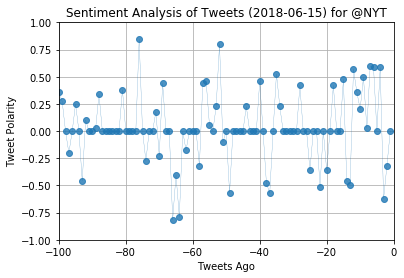

In [18]:
x_vals = nyt_df["Tweets Ago"]
y_vals = nyt_df["Compound"]
plt.plot(x_vals*-1,
         y_vals, marker="o", linewidth=0.25,
         alpha=0.8)


analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date}) for @NYT")
plt.xlim(-100,0) 
plt.ylim(-1,1) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()

plt.savefig("nyt.png")
plt.show()



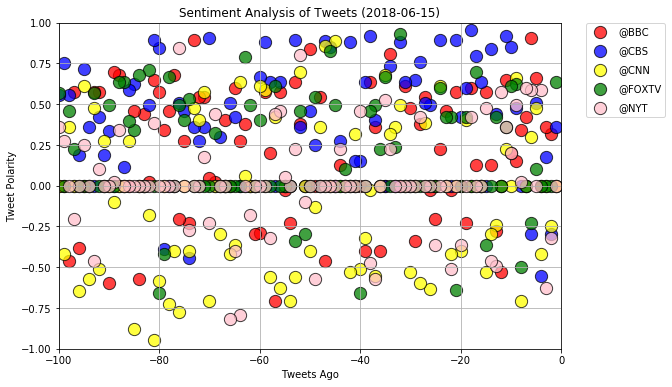

In [23]:
plt.figure(figsize=(9,6))
plt.scatter(bbc_df["Tweets Ago"]*-1,
         bbc_df["Compound"],s=150,c="red",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@BBC")
plt.scatter(cbs_df["Tweets Ago"]*-1,
         cbs_df["Compound"],s=150,c="blue",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@CBS")
plt.scatter(cnn_df["Tweets Ago"]*-1,
         cnn_df["Compound"],s=150,c="yellow",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@CNN")
plt.scatter(fox_df["Tweets Ago"]*-1,
         fox_df["Compound"],s=150,c="green",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@FOXTV")
plt.scatter(nyt_df["Tweets Ago"]*-1,
         nyt_df["Compound"],s=150,c="pink",  marker='o',
            edgecolor="black", linewidths=1, alpha=0.75, label="@NYT")
analysis_date = datetime.now()
analysis_date = analysis_date.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({analysis_date})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(frameon= True,labelspacing= 0.9,bbox_to_anchor = (1.05,1),loc=2,borderaxespad=0.)
plt.xlim(-100,0)
plt.ylim(-1,1)
plt.grid(True)

plt.savefig("FinalAnalysis.png")
#Show plot
plt.show()

In [49]:
import numpy as np
plt.figure(figsize=(9,6))
bar_data_labels = ["@BBC","@CBS","@CNN","@FOXNEWS","@NYT"]

bar_data_compound = []
bar_data_compound.append(bbc_df['Compound'].mean())
bar_data_compound.append(cbs_df['Compound'].mean())
bar_data_compound.append(cnn_df['Compound'].mean())
bar_data_compound.append(fox_df['Compound'].mean())
bar_data_compound.append(nyt_df['Compound'].mean())


array([0, 1, 2, 3, 4])

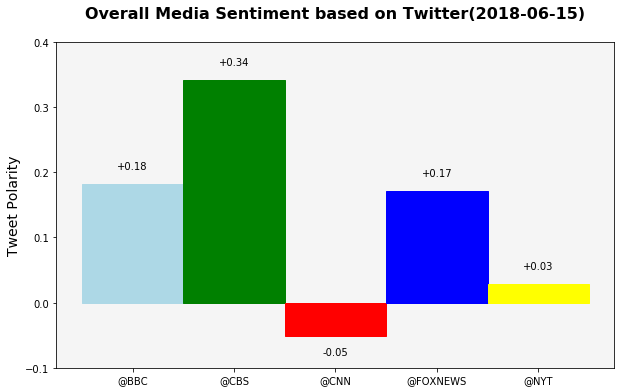

In [83]:
barChartData = {'Name':bar_data_labels,'Overall':bar_data_compound}
chart_df = pd.DataFrame(barChartData)
ax = plt.figure(figsize=(10,6)).add_subplot(111)

ax.patch.set_facecolor('whitesmoke')
ch = ax.bar(chart_df['Name'],chart_df['Overall'],width = 1,)

ch[0].set_color('lightblue')
ch[1].set_color('green')
ch[2].set_color('red')
ch[3].set_color('blue')
ch[4].set_color('yellow')
#Print out its value on each bar chart
for i in range(len(ch)):
        height = ch[i].get_height()
        value=  round(chart_df['Overall'][i],2)
        if height<0:
            height = height-0.032
        elif height>0:
            height = height+0.02
            value = f"+{value}"
        ax.text(ch[i].get_x() + ch[i].get_width()/2, 1*height,value,
                ha='center', va='bottom')
ax.set_title(f"Overall Media Sentiment based on Twitter({now})\n", fontsize = 16,fontweight="bold")
ax.set_ylim(-0.1,0.4)
ax.set_ylabel('Tweet Polarity',fontsize = 14)
plt.savefig("OverallMediaSentiment.png")
plt.show()